In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
from tqdm import tqdm
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path
import soundfile as sf  # Para guardar en formato WAV
from sklearn.metrics import accuracy_score, recall_score, f1_score


In [55]:
def extraer_caracteristicas_1(ruta_completa,clase):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    # Calcular las derivadas primera y segunda (delta y delta-delta)
    delta_mfcc = librosa.feature.delta(mfccs)
    delta_delta_mfcc = librosa.feature.delta(mfccs, order=2)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])
    clase=clase



    # Crear una fila con todos los datos
    caracteristicas = [
        ruta_completa,
        mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,
        clase
    ]
    return caracteristicas


In [56]:
# funcion extractor de caracteristicas datos nuevos
def extraer_caracteristicas_nuevos(ruta_completa):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])




    # Crear una fila con todos los datos
    caracteristicas = [mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,

    ]
    return caracteristicas

In [57]:
data = []

In [58]:
# Lista para almacenar las filas del dataset hombre y mujeres enfermos
#data = []
directorio_audio="/content/drive/MyDrive/Education & Certfications/02 ITESM Maestria MNA/Periodo 6 (enero 2024)/TC5035 - Proyecto Integrador/Codigos de Prueba/Datasets/frase/Total/Enfermos"
clase="sick"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

       # nombres_columnas = [
       # 'Ruta',
       # 'Media señal',
       # 'Desviación estándar de la señal',
       # 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
       # 'Amplitud máxima',
       # 'Amplitud mínima',
       # 'Promedio del centroides espectrales',
       # 'Promedio del ancho de banda espectral',
       # 'Promedio del rolloff espectral',
       # 'Promedio de la tasa de cruce por cero',
       # 'RMS (Root Mean Square)',
       # 'Clase'
   ## ]

#df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


100%|██████████| 1356/1356 [01:35<00:00, 14.16it/s]


In [59]:
# Lista para almacenar las filas del dataset hombre y mujeres sanas
#data = []
directorio_audio="/content/drive/MyDrive/Education & Certfications/02 ITESM Maestria MNA/Periodo 6 (enero 2024)/TC5035 - Proyecto Integrador/Codigos de Prueba/Datasets/frase/Total/Sanos"
clase="sano"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

100%|██████████| 634/634 [00:34<00:00, 18.30it/s]


In [60]:
# funcion para nuevos datos

def nuevos_datos(directorio_audio):

    datos_nuevos = []
    clase="desconocido"


# Iterar sobre los archivos de audio en el directorio
    for archivo_audio in tqdm(os.listdir(directorio_audio)):
            if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
                ruta_completa = os.path.join(directorio_audio, archivo_audio)
                # Extraer características 1
                fila = extraer_caracteristicas_nuevos(ruta_completa)

                # Agregar la fila a la lista de datos
                datos_nuevos.append(fila)
                df_nuevos = pd.DataFrame(datos_nuevos)

    return df_nuevos




In [61]:
nombres_columnas = [
        'Ruta',
        'Media señal',
        'Dstandar',#Desviación estándar de la señal
        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
        'Amáxima',#Amplitud maxima
        'Amín',#Amplitud mínima
        'AvgCS', # Promedio del centroides espectrales
        'AvgBws',#Promedio del ancho de banda espectral
        'Avgrolloff',#Promedio del rolloff espectral
        'AvgCrossZ',#Promedio de la tasa de cruce por cero
        'RMS ',#RMS (Root Mean Square)
        'Clase'
    ]

df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


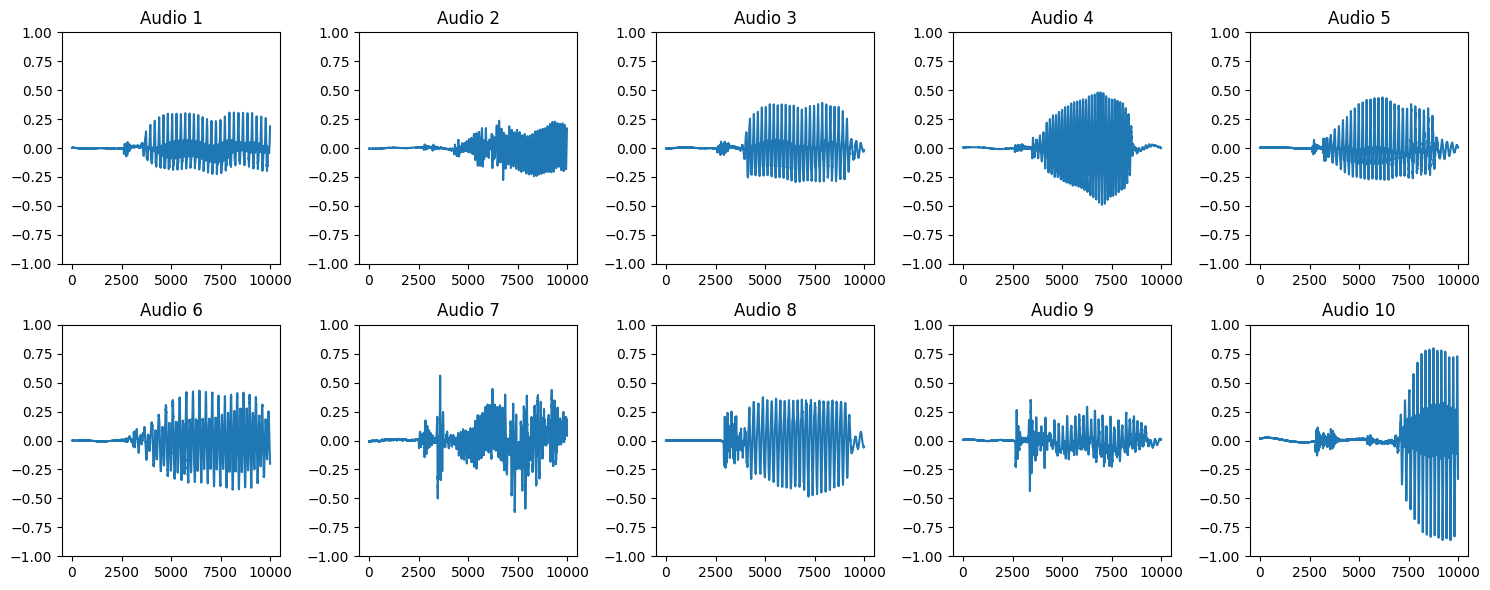

In [62]:
#grafica audios personas enfermas

# Ruta de la carpeta con los archivos WAV
folder_path = '/content/drive/MyDrive/Education & Certfications/02 ITESM Maestria MNA/Periodo 6 (enero 2024)/TC5035 - Proyecto Integrador/Codigos de Prueba/Datasets/frase/Total/Enfermos'

# Lista para almacenar los audios
enfermos_signals = []

# Iterar sobre los archivos WAV en la carpeta
for p in Path(folder_path).glob('*.wav'):
    audio, sr = librosa.load(p, sr=None)
    enfermos_signals.append(audio)
    # Guardar el audio en formato WAV
    sf.write(f'audio_{len(enfermos_signals)}.wav', audio, sr)

    # Mostrar solo los primeros 10
    if len(enfermos_signals) == 10:
        break

# Mostrar los primeros 10 audios
plt.figure(figsize=(15, 6))
for i, x in enumerate(enfermos_signals):
    plt.subplot(2, 5, i+1)
    plt.plot(x[:10000])
    plt.ylim(-1, 1)
    plt.title(f'Audio {i+1}')
    plt.tight_layout()

plt.show()

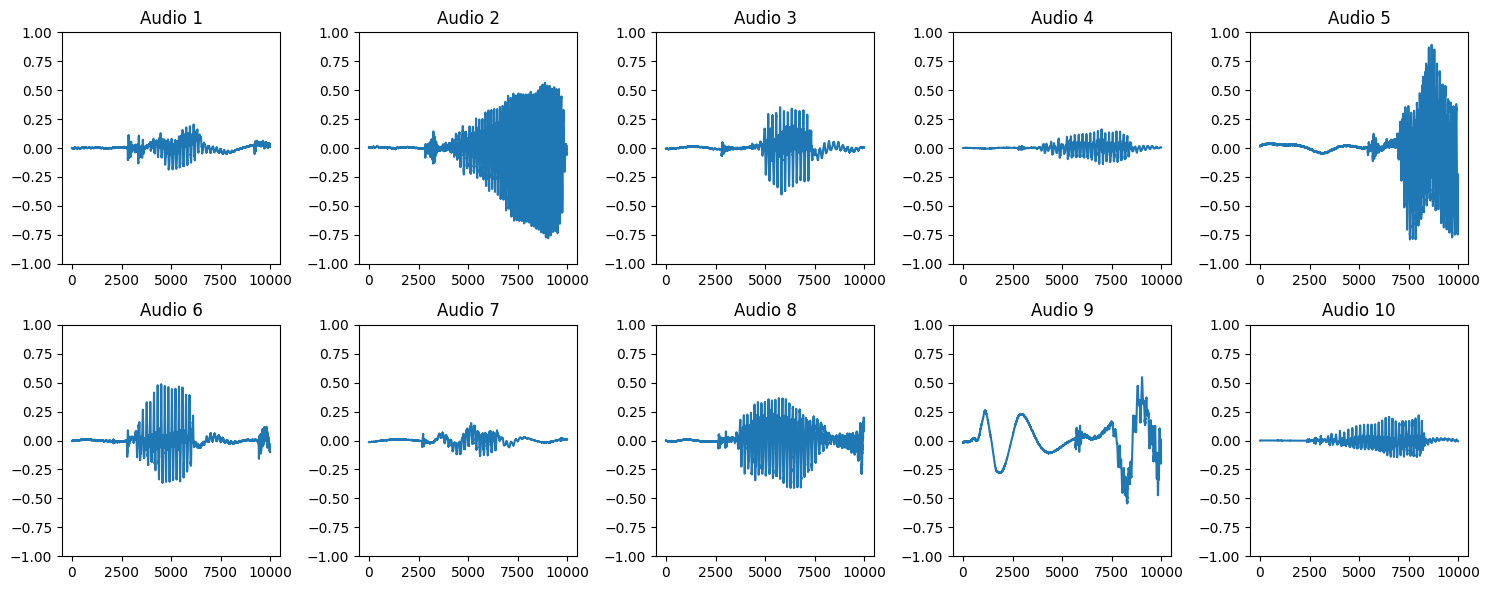

In [63]:
#audios personas sanas

# Ruta de la carpeta con los archivos WAV
folder_sanos = '/content/drive/MyDrive/Education & Certfications/02 ITESM Maestria MNA/Periodo 6 (enero 2024)/TC5035 - Proyecto Integrador/Codigos de Prueba/Datasets/frase/Total/Sanos'

# Lista para almacenar los audios
sanos_signals = []

# Iterar sobre los archivos WAV en la carpeta
for p in Path(folder_sanos).glob('*.wav'):
    audio, sr = librosa.load(p, sr=None)
    sanos_signals.append(audio)
    # Guardar el audio en formato WAV
    sf.write(f'audio_{len(sanos_signals)}.wav', audio, sr)

    # Mostrar solo los primeros 10
    if len(sanos_signals) == 10:
        break

# Mostrar los primeros 10 audios
plt.figure(figsize=(15, 6))
for i, x in enumerate(sanos_signals):
    plt.subplot(2, 5, i+1)
    plt.plot(x[:10000])
    plt.ylim(-1, 1)
    plt.title(f'Audio {i+1}')
    plt.tight_layout()

plt.show()

In [64]:
print(df)

                                                   Ruta  Media señal  \
0     /content/drive/MyDrive/Education & Certficatio...     0.000095   
1     /content/drive/MyDrive/Education & Certficatio...     0.000110   
2     /content/drive/MyDrive/Education & Certficatio...     0.000109   
3     /content/drive/MyDrive/Education & Certficatio...     0.000479   
4     /content/drive/MyDrive/Education & Certficatio...     0.000536   
...                                                 ...          ...   
1984  /content/drive/MyDrive/Education & Certficatio...     0.000223   
1985  /content/drive/MyDrive/Education & Certficatio...    -0.000366   
1986  /content/drive/MyDrive/Education & Certficatio...    -0.000150   
1987  /content/drive/MyDrive/Education & Certficatio...     0.000164   
1988  /content/drive/MyDrive/Education & Certficatio...     0.000361   

      Dstandar      MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0     0.088102 -306.125122  118.003387  10.284997  26.343765

In [65]:
#directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/PATH/Hombre_frases_path"
###clase="sick"
#recorrer_archivos_audio(directorio_audio,clase)


In [66]:
print(df.describe())

       Media señal     Dstandar       MFCC_1       MFCC_2       MFCC_3  \
count  1989.000000  1989.000000  1989.000000  1989.000000  1989.000000   
mean     -0.002534     0.114780  -290.707001   108.158401    23.830561   
std       0.017173     0.039730    38.950882    17.415962    11.063201   
min      -0.157601     0.035656  -491.181824    47.859734   -12.247462   
25%      -0.000071     0.086846  -316.881348    96.870117    16.370924   
50%       0.000074     0.108804  -291.282074   107.900703    24.155104   
75%       0.000274     0.136151  -265.745087   120.191734    31.381706   
max       0.005689     0.379412  -155.457825   163.457306    58.902077   

            MFCC_4       MFCC_5       MFCC_6       MFCC_7       MFCC_8  ...  \
count  1989.000000  1989.000000  1989.000000  1989.000000  1989.000000  ...   
mean     29.947090    11.759085    -3.769554    -3.727649     4.045877  ...   
std       8.665900     8.512942     8.765687     6.856540     6.692706  ...   
min      -8.58713

<ipython-input-67-865cca46b406>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method="pearson")


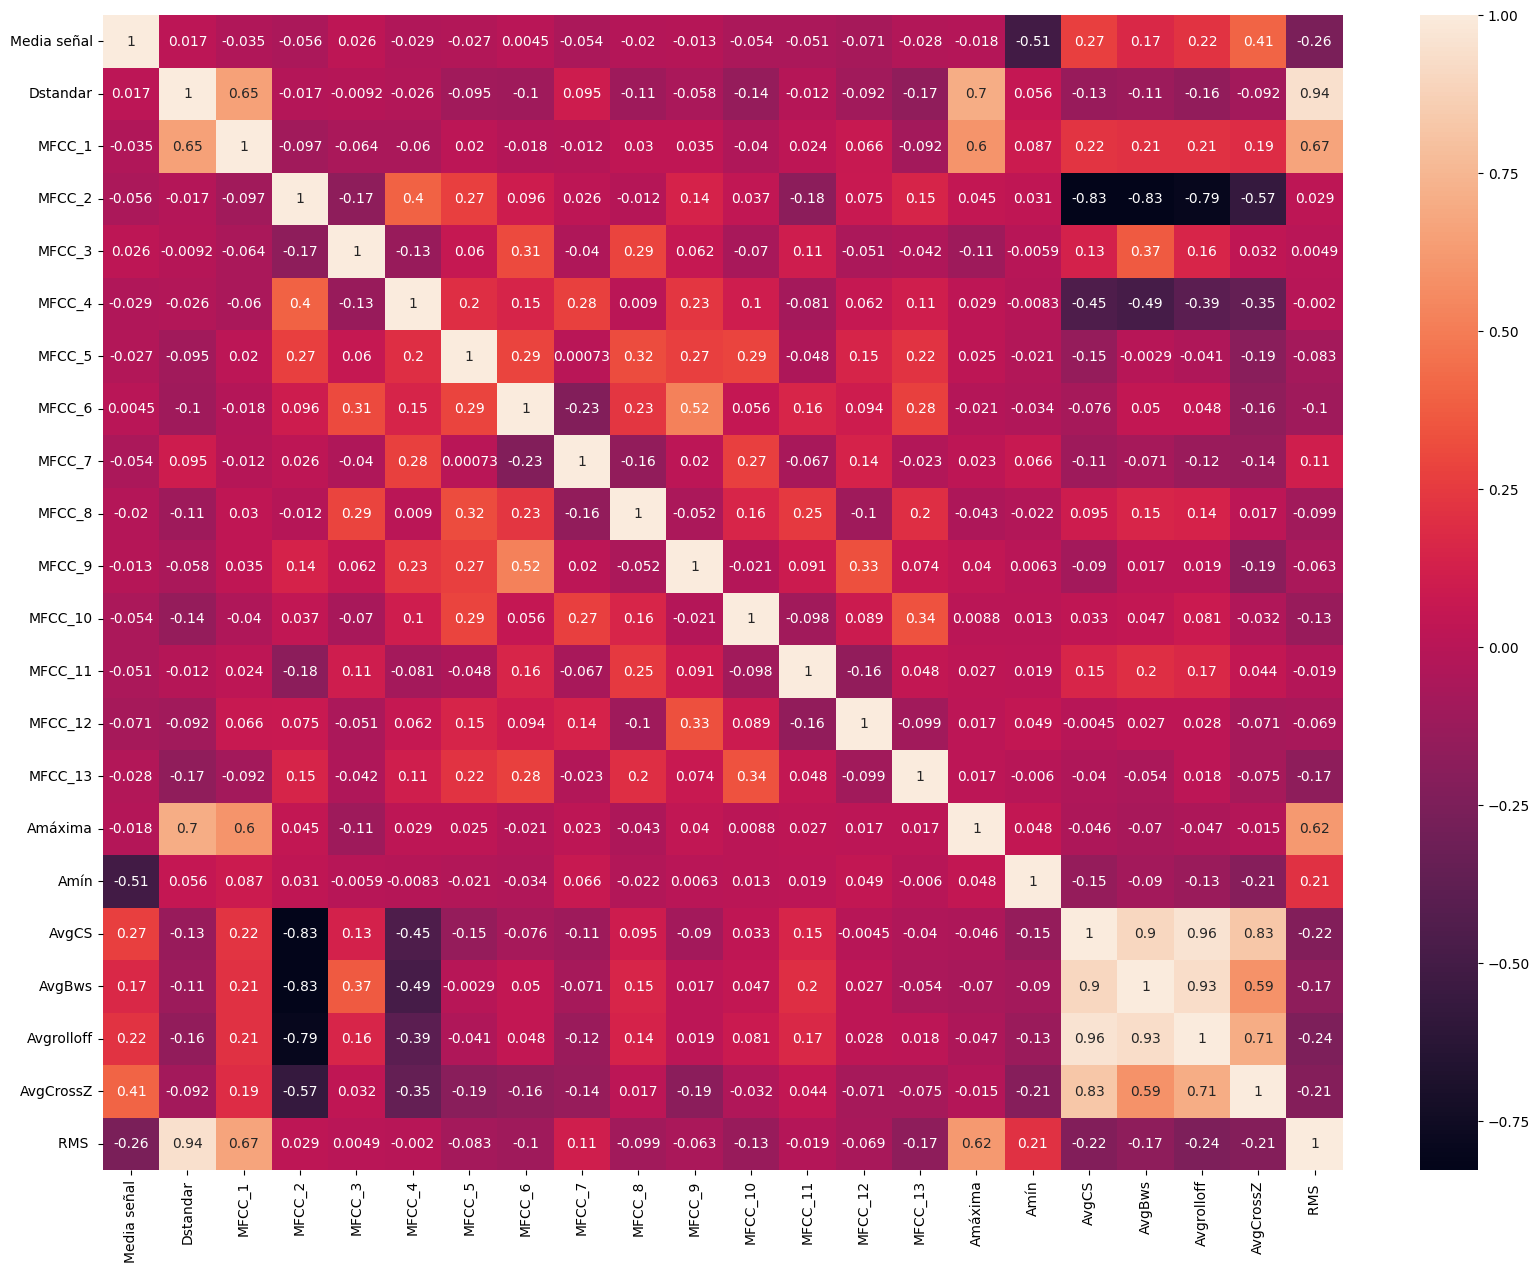

In [67]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



corr_df = df.corr(method="pearson")

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

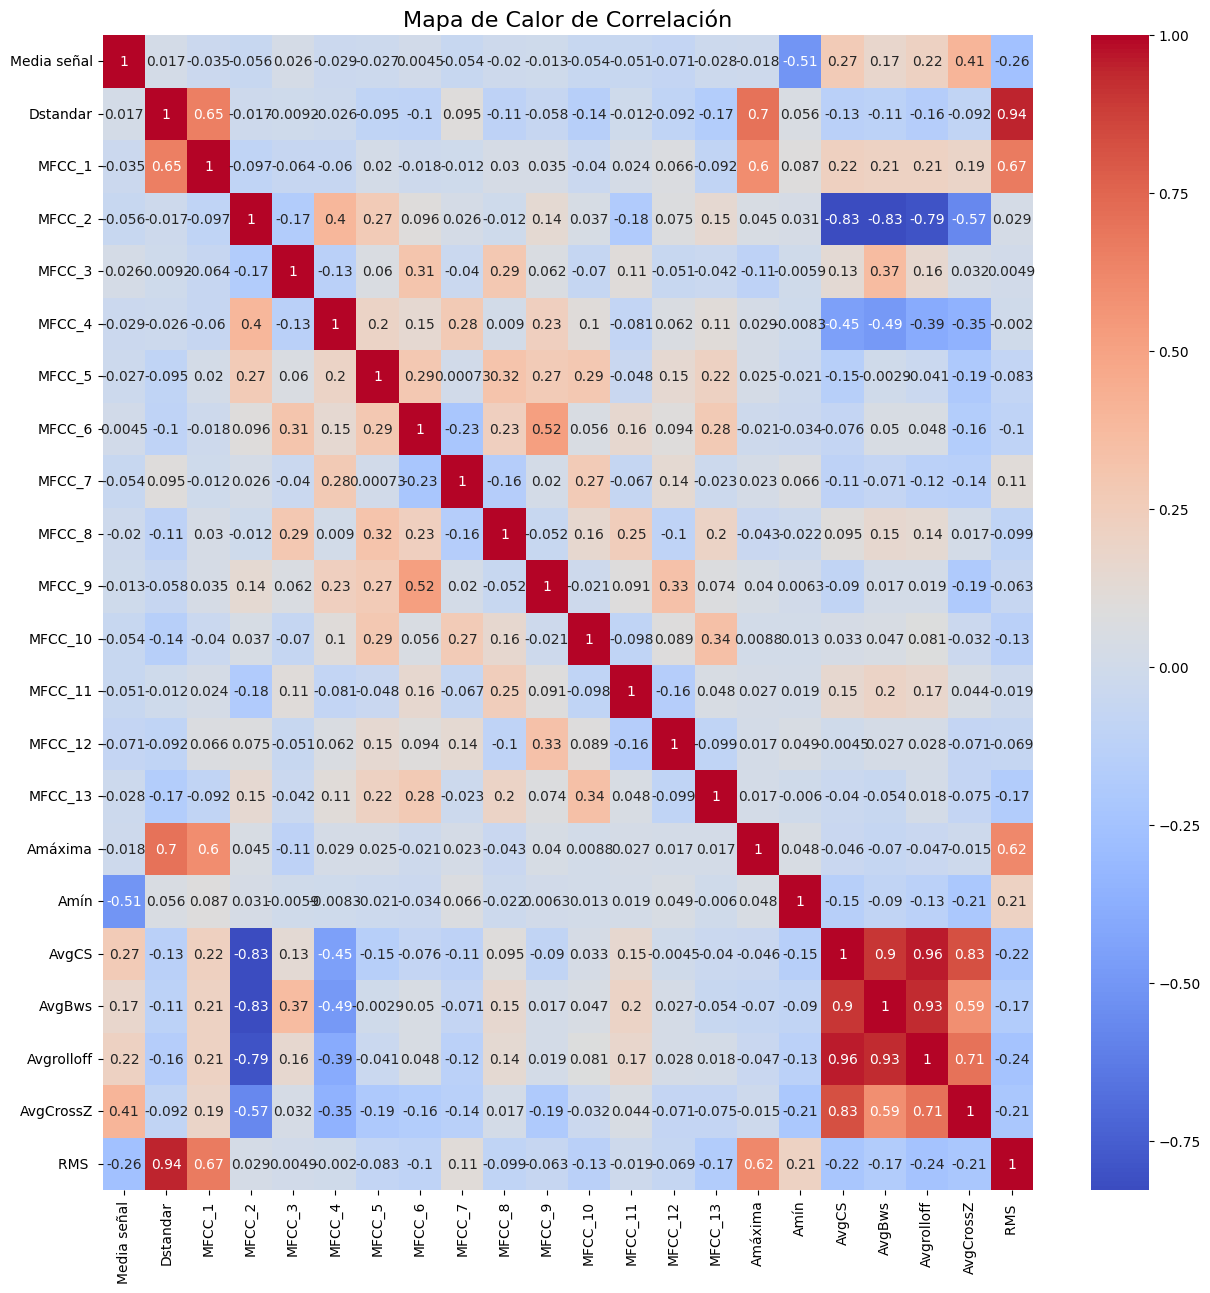

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df y corr_df

# Crear una figura y ejes más grandes
fig, ax = plt.subplots(figsize=(15, 15))

# Crear el mapa de calor
sns.heatmap(corr_df, cmap='coolwarm', annot=True, ax=ax)

# Establecer el título
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Mostrar el mapa de calor
plt.show()

In [69]:
df['Clase'] = df['Clase'].map({'sick': 1, 'sano': 0})

In [70]:
#Balancear datos


In [71]:
df = df.drop('Ruta', axis=1)

X = np.array(df.drop(['Clase'],1))
y = np.array(df['Clase'])
X.shape
df

<ipython-input-71-4b67d6dff44b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Clase'],1))


,Media señal,Dstandar,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_12,MFCC_13,Amáxima,Amín,AvgCS,AvgBws,Avgrolloff,AvgCrossZ,RMS,Clase
0,0.000095,0.088102,-306.125122,118.003387,10.284997,26.343765,7.900147,-21.435762,-5.512975,7.804689,...,-5.581189,-5.601613,0.459961,8.324569e-07,1642.617734,1936.620989,3082.942469,0.065209,0.074109,1
1,0.000110,0.070869,-296.099518,106.222221,34.003918,24.066387,13.465153,-19.057505,-9.639557,9.719926,...,-4.622250,-9.785992,0.407474,0.000000e+00,1910.183441,2341.776139,3911.597978,0.061004,0.062912,1
2,0.000109,0.130585,-273.725281,112.579475,6.799158,29.870281,8.065639,-18.900719,-4.689154,8.903790,...,-5.596137,-6.208922,0.642555,0.000000e+00,1696.237959,1896.501338,3078.386719,0.068003,0.112240,1
3,0.000479,0.113513,-339.813812,91.201271,16.961363,25.160759,2.791752,-7.578752,-2.700185,3.448273,...,-7.609092,-5.743888,0.501675,0.000000e+00,1555.574823,2021.797819,3016.076660,0.049710,0.087413,1
4,0.000536,0.089877,-282.439087,109.824287,17.232365,32.695984,6.277915,-19.289959,-2.748127,12.634590,...,-8.159726,-4.587823,0.456548,0.000000e+00,1917.377446,2028.442604,3469.310347,0.082555,0.079015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.000223,0.123143,-267.917603,102.988174,1.039046,29.556770,9.429520,-6.711182,-0.490769,0.581821,...,-0.415819,-10.175364,0.778458,0.000000e+00,1739.651296,2027.273047,3228.063129,0.057657,0.097334,0
1985,-0.000366,0.108274,-322.485046,117.928276,28.001892,18.494282,10.085310,-4.145987,-7.102346,5.853295,...,-2.278899,-11.623842,0.820962,1.174267e-07,1534.432341,2063.273740,2857.955933,0.061410,0.082863,0
1986,-0.000150,0.059184,-373.009033,101.938080,9.405515,32.285873,16.268103,-19.286997,-6.413719,-2.742286,...,-3.836427,-1.722202,0.421967,7.030394e-09,1914.072166,2138.040573,3805.490178,0.076295,0.047431,0
1987,0.000164,0.109170,-306.176361,113.108849,15.948504,15.182151,7.597143,3.509100,-15.734047,3.905889,...,1.927975,-6.490490,0.587995,0.000000e+00,1541.844467,2051.964005,3001.271751,0.057124,0.090286,0


In [72]:
# Cardinalidad de las variables categóricas
cardinalidad_categoricas = df['Clase'].nunique()
print(f"Cardinalidad de la variable categórica 'Clase': {cardinalidad_categoricas}")

Cardinalidad de la variable categórica 'Clase': 2


In [73]:
#df = df.drop('Ruta', axis=1)

#X = np.array(df.drop(['Clase'],1))
#y = np.array(df['Clase'])
#X.shape

In [74]:
# Verificar si hay algún valor nulo en el DataFrame
hay_nulos = df.isnull().any().any()

# Imprimir el resultado
if hay_nulos:
    print("El DataFrame tiene valores nulos.")
else:
    print("El DataFrame no tiene valores nulos.")

El DataFrame no tiene valores nulos.


In [75]:
# Verificar desequilibrio en las clases
desequilibrio_clases = df['Clase'].value_counts()
print("Distribución de clases:")
print(desequilibrio_clases)
# 1= enfermo
# 2= sano

Distribución de clases:
1    1355
0     634
Name: Clase, dtype: int64


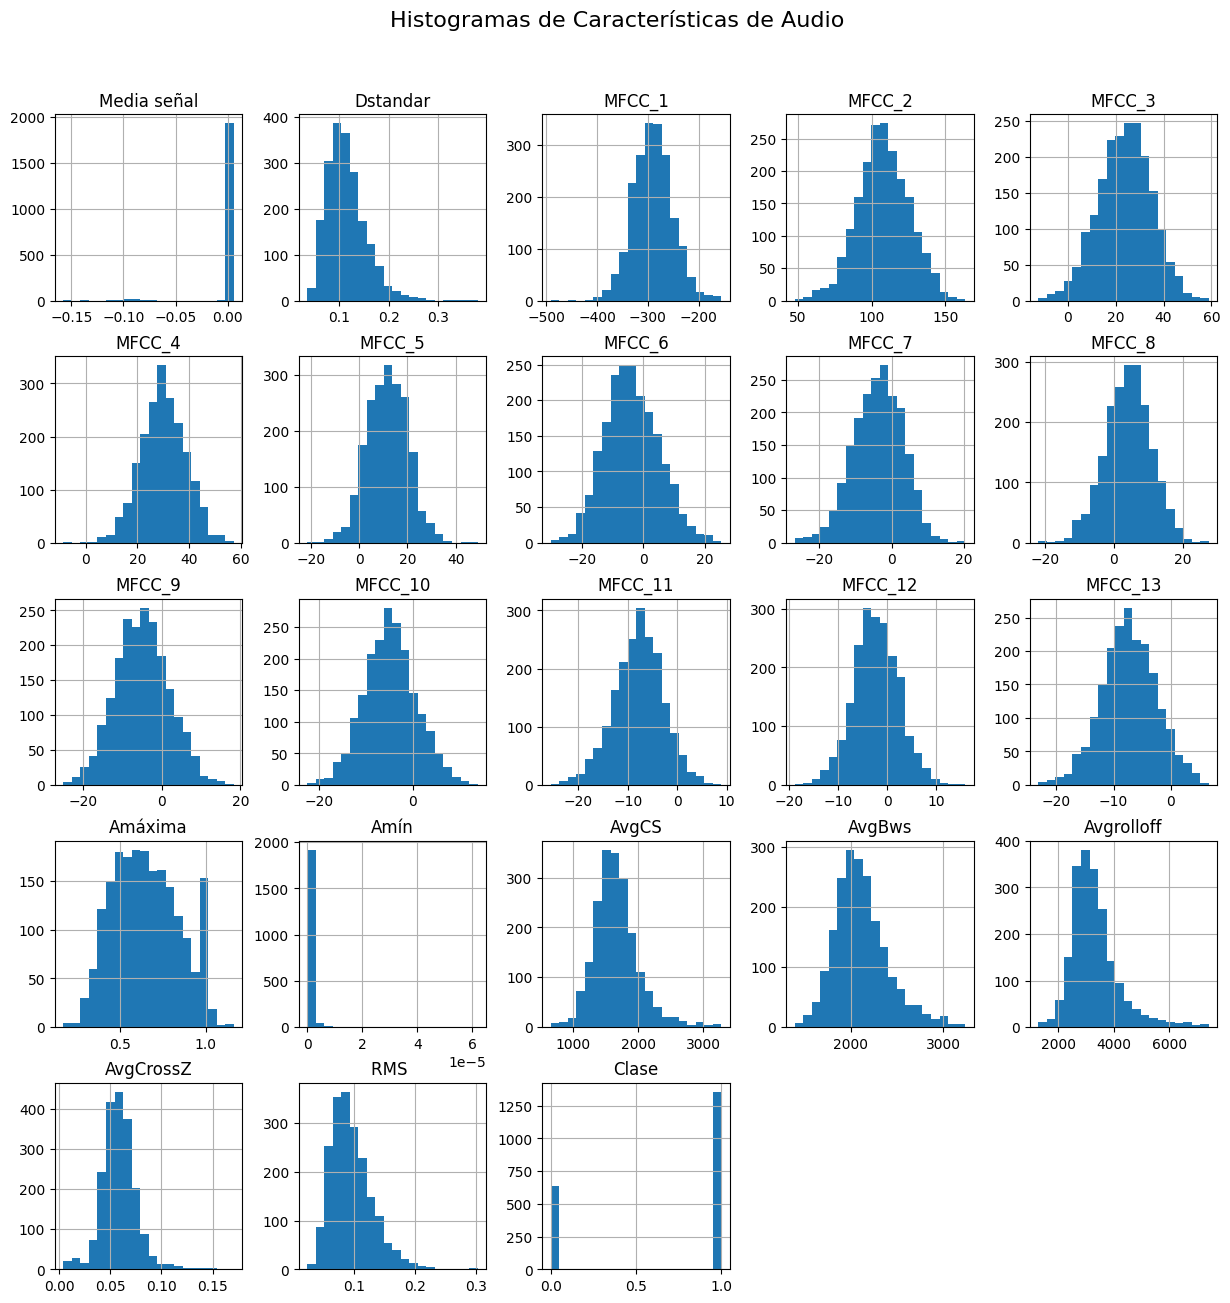

In [76]:
# Visualizar histogramas
df.hist(bins=20, figsize=(15, 15))
plt.suptitle('Histogramas de Características de Audio', y=0.95, fontsize=16)
plt.show()

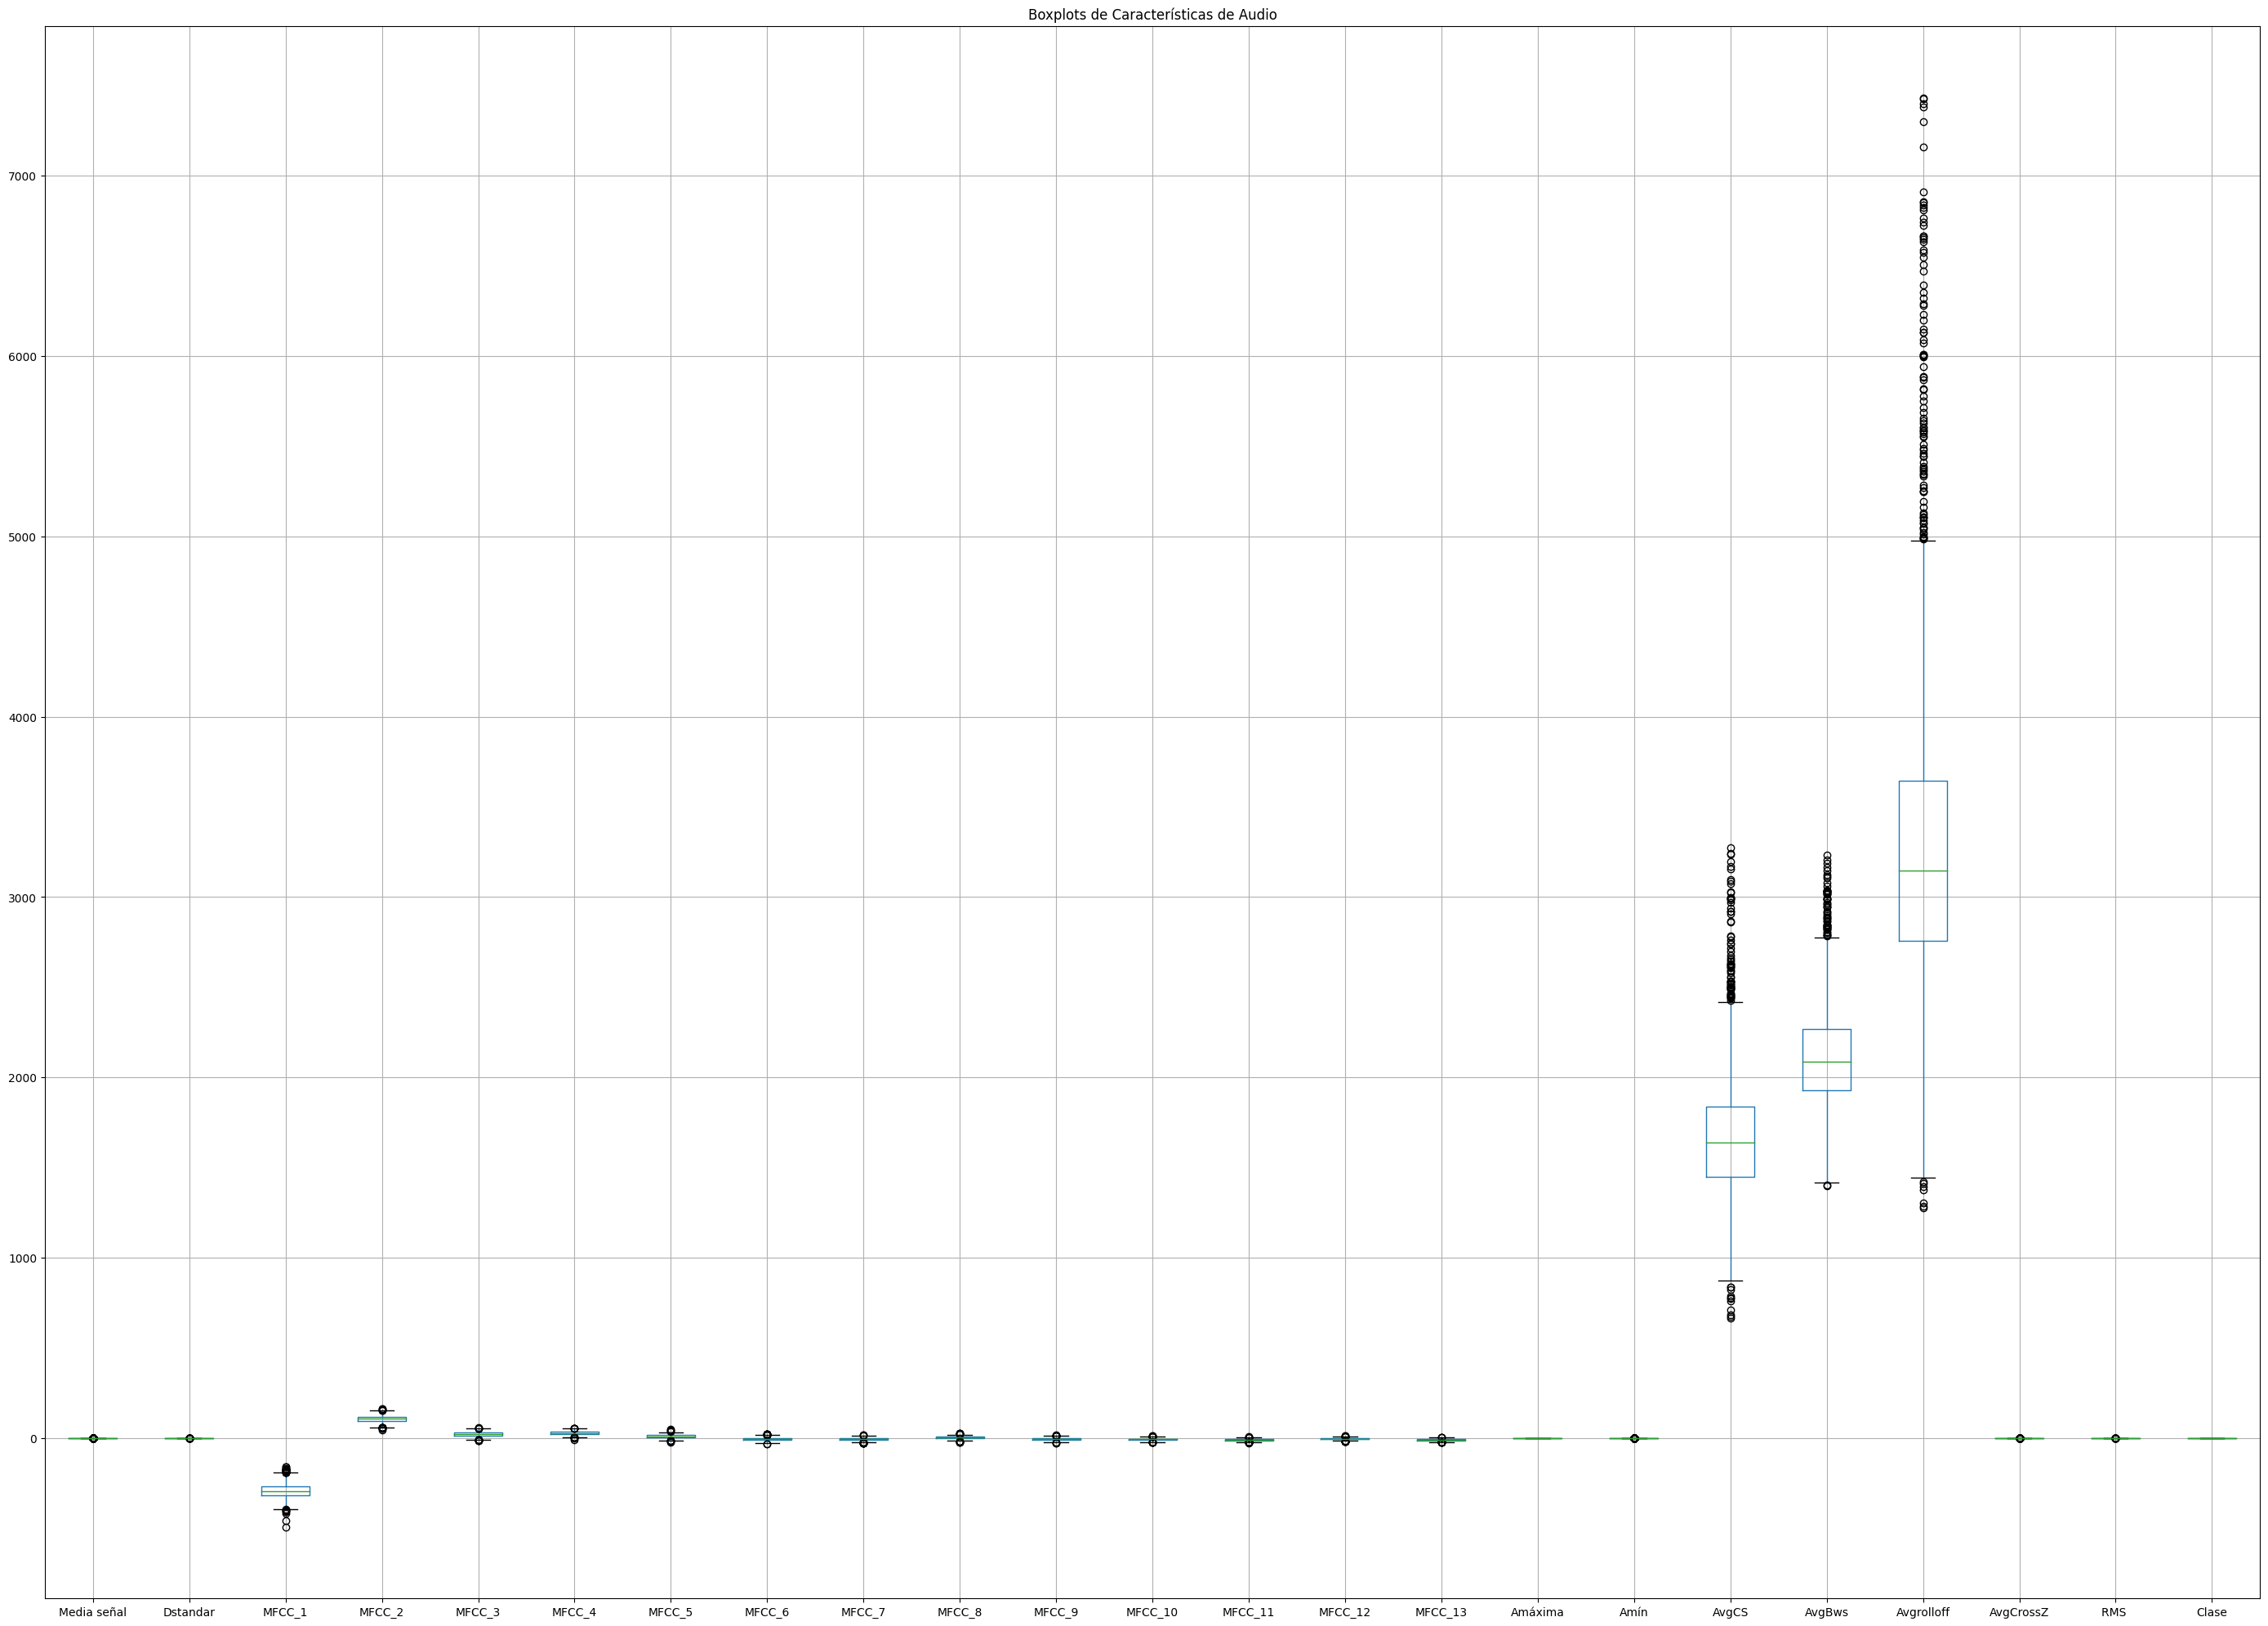

In [77]:
# Visualizar boxplots para identificar valores atípicos
df.boxplot(figsize=(35, 25))
plt.title('Boxplots de Características de Audio')
plt.show()

In [78]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb

model = linear_model.LogisticRegression()
model.fit(X,y)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
predictions = model.predict(X)
print(predictions)

[0 1 0 ... 1 1 1]


In [80]:
model.score(X,y)

0.7114127702362997

In [81]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [82]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=8, random_state=seed,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.697671 (0.027495)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
#directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/personas_enfermas_hombre_mujeres_test"
##X_new = nuevos_datos(directorio_audio)
#model.predict(X_new)

<ipython-input-84-7098ec0caff0>:141: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Clase'],1))


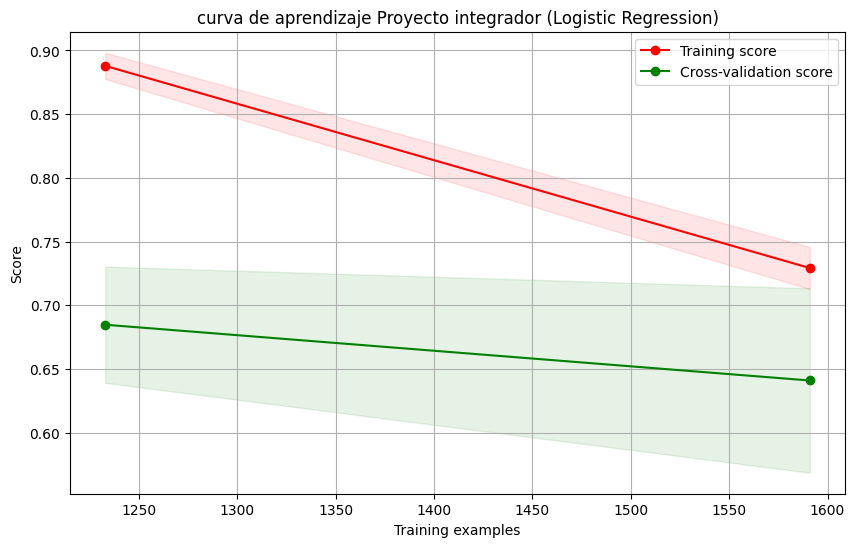

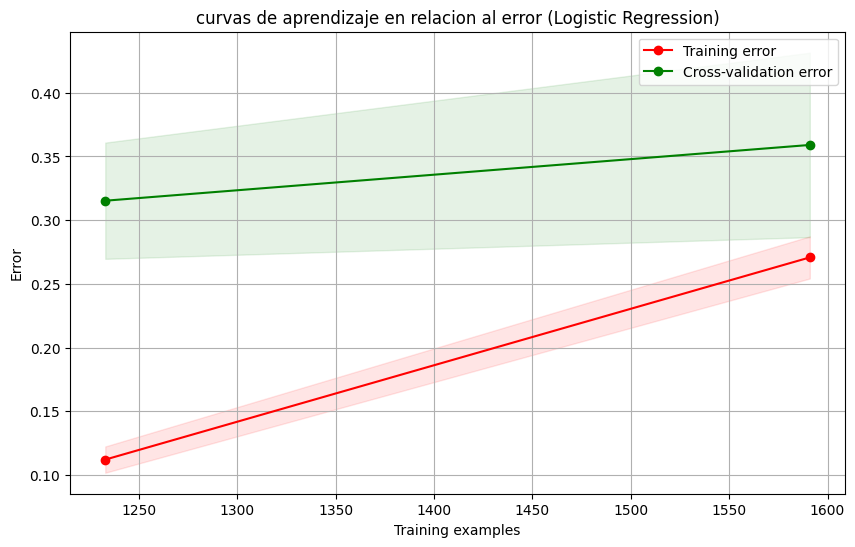

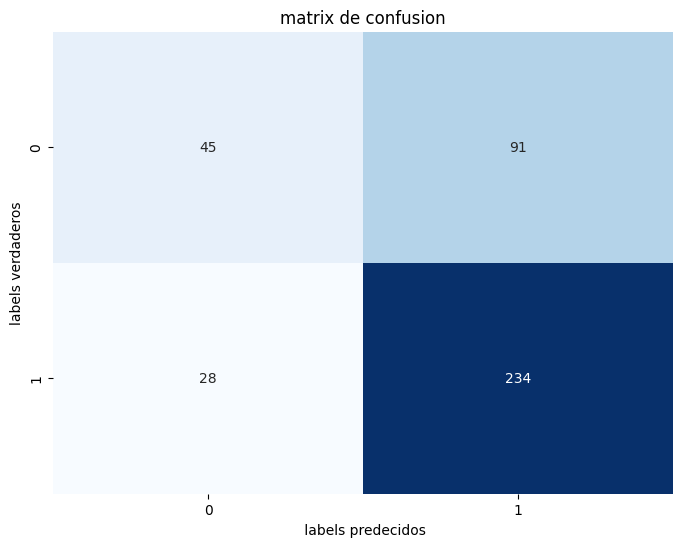

Training score: 0.7247014456316782
Test score: 0.7010050251256281
recall_score: 0.7010050251256281
f1_score: 0.671986064341908


In [84]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import learning_curve

def plot_learning_curve_with_error(estimator, title, X, y, ylim=None, cv=None,
                                   n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para evaluar el rendimiento del modelo en relación al error.

    Args:
    estimator : Objeto estimador.
    title : Título del gráfico.
    X : Features del dataset.
    y : Variable objetivo del dataset.
    ylim : Tuple (ymin, ymax) para fijar límites en el eje y.
    cv : Estrategia de validación cruzada.
    n_jobs : Número de trabajos a ejecutar en paralelo (por defecto=None).
    train_sizes : Valores de tamaño de entrenamiento para los cuales se generan las curvas de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1 - np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1 - np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.legend(loc="best")
    return plt


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para evaluar el rendimiento del modelo.

    Args:
    estimator : Objeto estimador.
    title : Título del gráfico.
    X : Features del dataset.
    y : Variable objetivo del dataset.
    ylim : Tuple (ymin, ymax) para fijar límites en el eje y.
    cv : Estrategia de validación cruzada.
    n_jobs : Número de trabajos a ejecutar en paralelo (por defecto=None).
    train_sizes : Valores de tamaño de entrenamiento para los cuales se generan las curvas de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def evaluate_logistic_regression(X, y, test_size=0.2, random_state=None, penalty='l2', C=1.0):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Inicializar y entrenar el modelo de regresión logística
    model = LogisticRegression(penalty=penalty, C=C, max_iter=1000)
    model.fit(X_train, y_train)

    # Evaluar el rendimiento en el conjunto de entrenamiento y prueba
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Obtener curvas de aprendizaje
    title = "curva de aprendizaje Proyecto integrador (Logistic Regression)"
    cv = 5
    plot_learning_curve(model, title, X, y, cv=cv, n_jobs=-1)
    plt.show()

     # Obtener curvas de aprendizaje con error
    title = "curvas de aprendizaje en relacion al error (Logistic Regression)"
    cv = 5
    plot_learning_curve_with_error(model, title, X, y, cv=cv, n_jobs=-1)
    plt.show()

    # Predecir las clases en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel(" labels predecidos")
    plt.ylabel("labels verdaderos")
    plt.title("matrix de confusion")
    plt.show()

    print("Training score:", train_score)
    print("Test score:", test_score)


    print("recall_score:",recall_score(y_test, y_pred, average='weighted'))
    print("f1_score:",f1_score(y_test, y_pred, average='weighted'))

# Ejemplo de uso
X = np.array(df.drop(['Clase'],1))
y = np.array(df['Clase'])

evaluate_logistic_regression(X, y, test_size=0.2, random_state=42, penalty='l2', C=1.0)

In [85]:

predictions = model.predict(X_validation)

#print(recall_score(y_test, y_pred, average='weighted'))  # Calcular el recall promedio ponderado
#print( f1_score(y_test, y_pred, average='weighted'))  # Calcular el F1-score promedio ponderado
#print(accuracy_score(Y_validation, predictions))

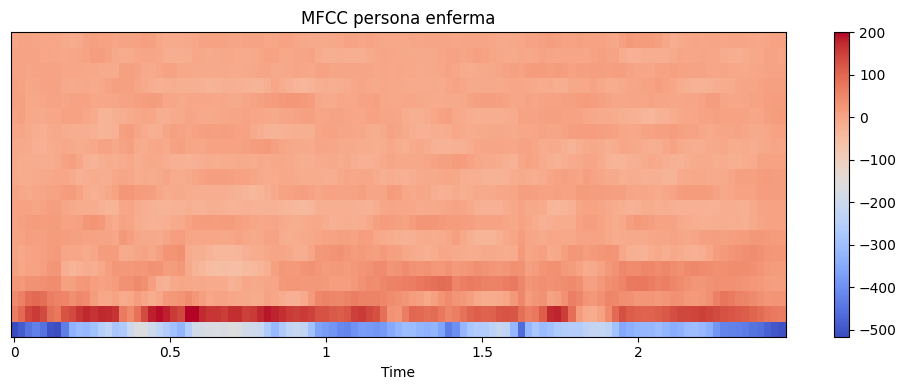

In [86]:
# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/Education & Certfications/02 ITESM Maestria MNA/Periodo 6 (enero 2024)/TC5035 - Proyecto Integrador/Codigos de Prueba/Datasets/frase/Hombres/Enfermos/1039-phrase.wav'
y, sr = librosa.load(audio_path)

# Calcular los MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Graficar los MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC persona enferma')
plt.tight_layout()
plt.show()

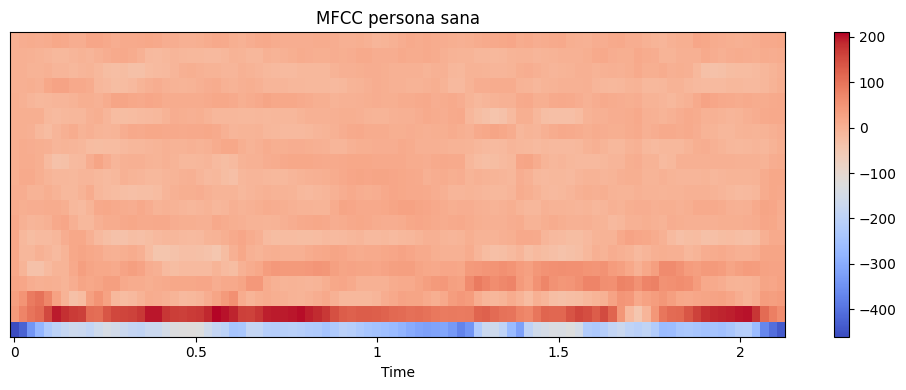

In [87]:
# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/Education & Certfications/02 ITESM Maestria MNA/Periodo 6 (enero 2024)/TC5035 - Proyecto Integrador/Codigos de Prueba/Datasets/frase/Hombres/Sanos/100-phrase.wav'
y, sr = librosa.load(audio_path)

# Calcular los MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Graficar los MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC persona sana')
plt.tight_layout()
plt.show()